In [9]:
# load the libraries

import sys
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import scipy.io as sio
import cv2
import json
import openslide

from hover_net.misc.wsi_handler import get_file_handler
from hover_net.misc.viz_utils import visualize_instances_dict

In [10]:
!python hover_net/run_infer.py --help

run_infer.py

Usage:
  run_infer.py [options] [--help] <command> [<args>...]
  run_infer.py --version
  run_infer.py (-h | --help)

Options:
  -h --help                   Show this string.
  --version                   Show version.

  --gpu=<id>                  GPU list. [default: 0]
  --nr_types=<n>              Number of nuclei types to predict. [default: 0]
  --type_info_path=<path>     Path to a json define mapping between type id, type name, 
                              and expected overlaid color. [default: '']

  --model_path=<path>         Path to saved checkpoint.
  --model_mode=<mode>         Original HoVer-Net or the reduced version used PanNuke and MoNuSAC, 
                              'original' or 'fast'. [default: fast]
  --nr_inference_workers=<n>  Number of workers during inference. [default: 8]
  --nr_post_proc_workers=<n>  Number of workers during post-processing. [default: 16]
  --batch_size=<n>            Batch size per 1 GPU. [default: 32]

Two command mode 

specify your argument in run_tile.sh

In [ ]:
!hover_net/run_tile.sh

In [14]:
tile_path ='archive/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-10926/40X/SOB_M_DC-14-10926-40-001.png'
tile_json_path = 'Output/json/SOB_B_A-14-22549AB-40-013.json'
tile_mat_path = 'Output/mat/SOB_B_A-14-22549AB-40-004.mat'

tile_overlay_path = 'Output/overlay/SOB_M_DC-14-10926-40-001.png'

In [15]:
#image = cv2.imread(tile_path)
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

result_mat = sio.loadmat('./Output/mat/SOB_M_DC-14-10926-40-001.mat')

overlay = cv2.imread(tile_overlay_path)
overlay = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)
# ** now, let's get the outputs and print some basic shape information
# 2D map where each nucleus has a unique ID assigned. 0 is background
inst_map = result_mat['inst_map']
# Nx2 length array denoting nuclear type predictions. N is the number of nuclei
# idx=0 denotes the corresponding inst_id in the `inst_map` and
# idx=1 denotes the type of that inst_id
inst_type = result_mat['inst_type']

print('instance map shape', inst_map.shape)
# double check the number of instances is the same as the number of type predictions
print('number of instances', len(np.unique(inst_map)[1:].tolist()))
#print('number of type predictions', len(np.unique(inst_type[:,1])))
#print('overlay shape', overlay.shape)

instance map shape (460, 700)
number of instances 3


Text(0.5, 1.0, 'Overlay')

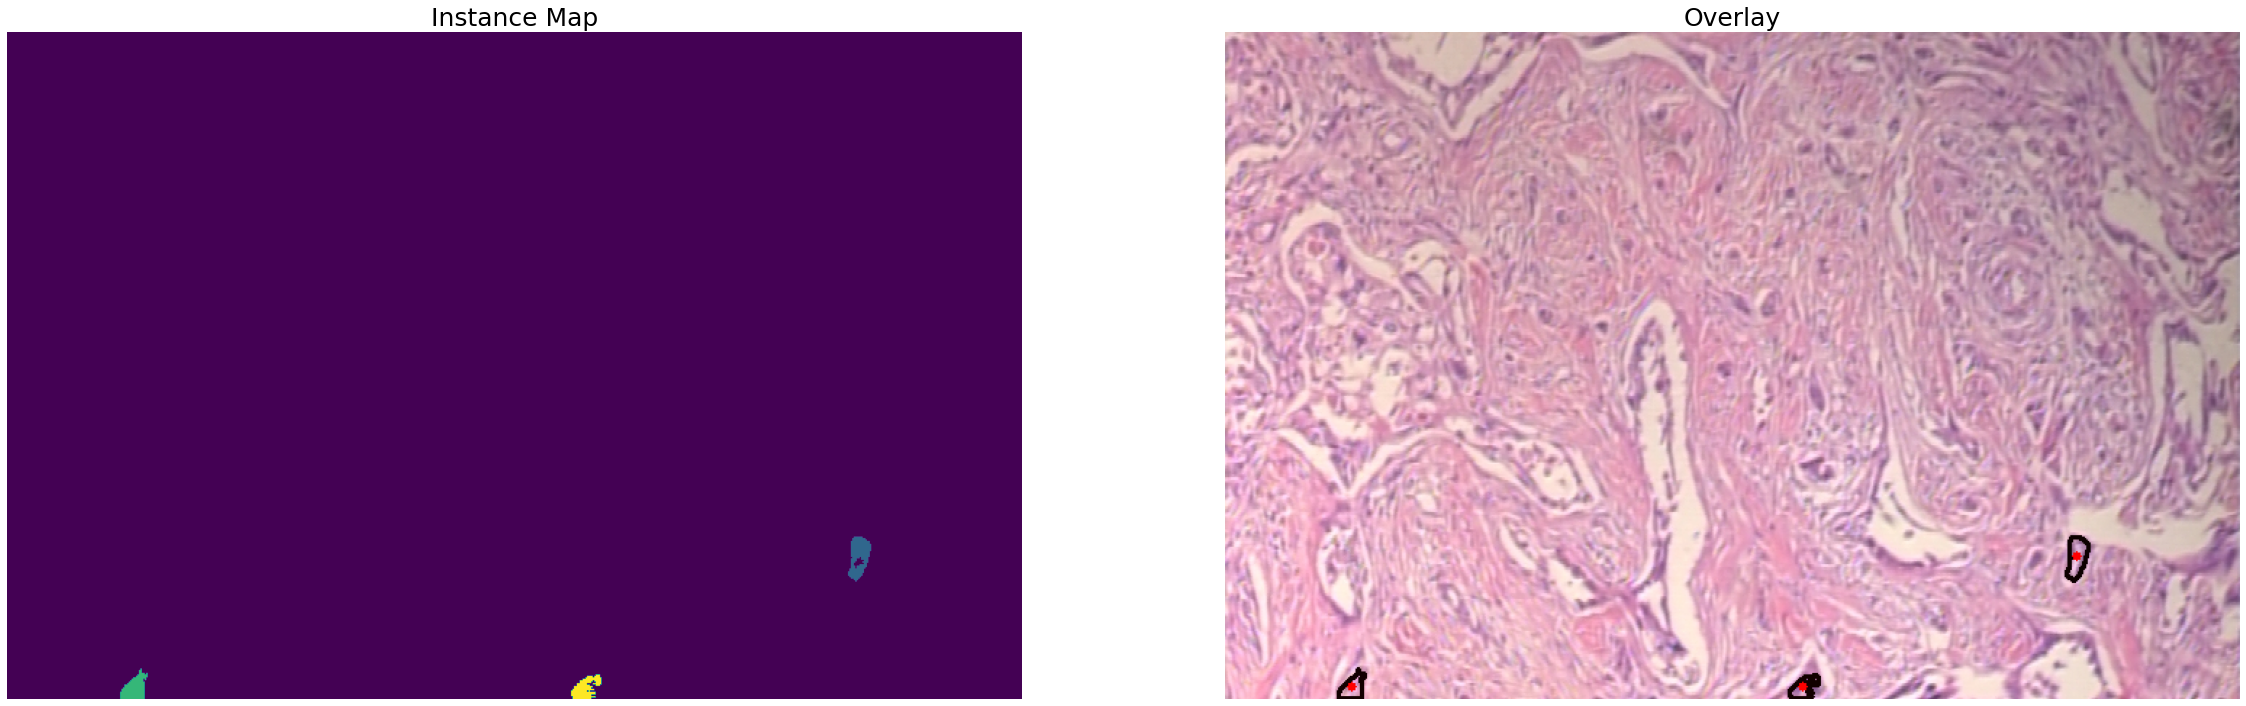

In [17]:
plt.figure(figsize=(40,20))

"""plt.subplot(1,2,1)
plt.imshow(image)
plt.axis('off')
plt.title('Image', fontsize=25)
"""
plt.subplot(1,2,1)
plt.imshow(inst_map)
plt.axis('off')
plt.title('Instance Map', fontsize=25)

plt.subplot(1,2,2)
plt.imshow(overlay)
plt.axis('off')
plt
plt.title('Overlay', fontsize=25)